In [91]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
#from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import make_scorer


In [69]:
# read raw data 
raw_data_white = pd.read_csv("winequality-red.csv", delimiter=';')
raw_data_red = pd.read_csv("winequality-white.csv", delimiter=';')

# add the information if it is red or white wine in an extra column as the attribute value combinations for good/bad wine may differ
raw_data_white['type'] = "white"
raw_data_red['type'] = "red"

# merge the two datasets
merged_raw_data = pd.concat([raw_data_red, raw_data_white], axis=0)

# show the created dataframe for red and white wine
merged_raw_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,red
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,red
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,red
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,red
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,red


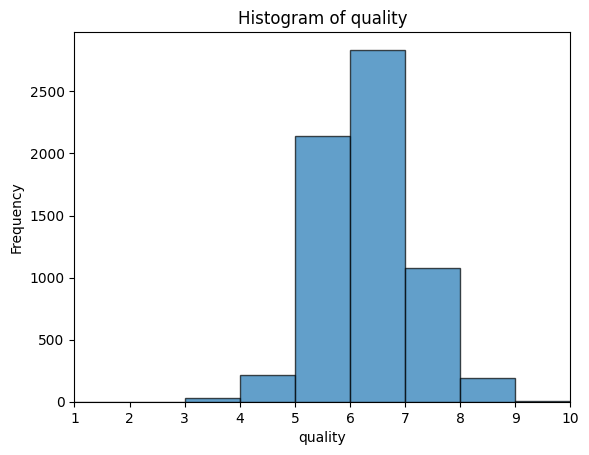

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64


In [70]:
# plot a histogram to detect imbalance in the dataset
plt.hist(merged_raw_data['quality'], bins=range(0, 12), edgecolor='k', alpha=0.7)
plt.xlabel('quality')
plt.ylabel('Frequency')
plt.title('Histogram of quality')
plt.xlim(1, 10)
plt.show()

# show the number of entries for each value
value_counts = merged_raw_data['quality'].value_counts()
print(value_counts)


In [75]:
# check for missing data
missing_data = merged_raw_data.isnull().sum()
print("Missing Data:")
missing_data

Missing Data:


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

C:\Users\lucas\AppData\Local\Temp\ipykernel_4944\1355630744.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  box_plot.set_xticklabels(box_plot.get_xticklabels(), rotation=45)


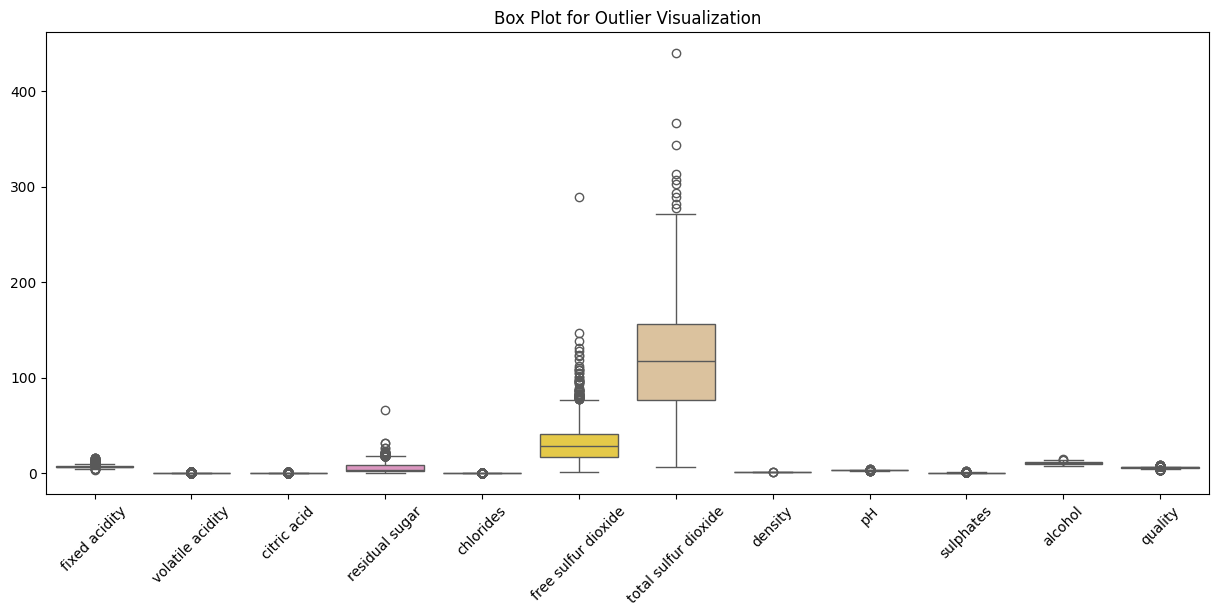

In [76]:
# detect and visualize outliers
plt.figure(figsize=(15, 6))
box_plot = sns.boxplot(data=merged_raw_data, palette='Set2')
plt.title("Box Plot for Outlier Visualization")
box_plot.set_xticklabels(box_plot.get_xticklabels(), rotation=45)
plt.show()

In [79]:
# define the IQR-based outlier detection function
def detect_outliers_iqr(series, threshold=4.0):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    return (series < lower_bound) | (series > upper_bound)

# select numerical columns for outlier detection
numerical_columns = data.select_dtypes(include=[np.number])

# exclude the string attribute from the outlier detection
outlier_mask = numerical_columns.apply(detect_outliers_iqr)

# count the number of rows with outliers
outlier_count = outlier_mask.any(axis=1).sum()

# display the count only once if there are outliers
if outlier_count > 0:
    print(f'There are {outlier_count} rows with outliers.')

There are 139 rows with outliers.


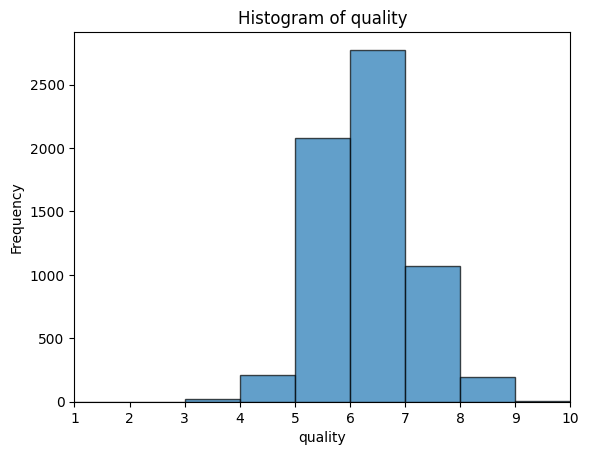

quality
6    2775
5    2082
7    1071
4     209
8     193
3      23
9       5
Name: count, dtype: int64


In [82]:
# for testing reasons: create a dataset without outliers
raw_data_no_outliers = merged_raw_data[~outlier_mask.any(axis=1)]

# plot a histogram to detect imbalance in the dataset
plt.hist(raw_data_no_outliers['quality'], bins=range(0, 12), edgecolor='k', alpha=0.7)
plt.xlabel('quality')
plt.ylabel('Frequency')
plt.title('Histogram of quality')
plt.xlim(1, 10)
plt.show()

# show the number of entries for each value
value_counts = raw_data_no_outliers['quality'].value_counts()
print(value_counts)


Removing the outliers affects one of the minority classes (quality = 3 / reduction in data points of approx. 30%). So there is a slight indication that there is a pattern. For the reason of missing domain knowledge alleged 'outliers' will remain in the data set. 

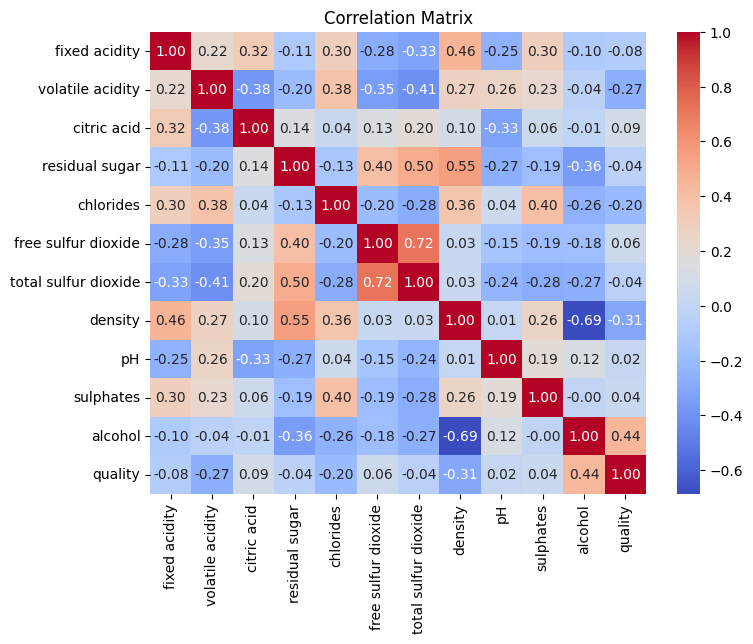

In [17]:
# create correlation matrix
correlation_matrix = merged_raw_data.corr()

# create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")

# plot the heatmap
plt.title("Correlation Matrix")
plt.show()

As residual sugar has a very low correlation (0.02) we could consider leaving the feature out. 

In [90]:
# encode the string variable to a numerical value 
label_encoder = LabelEncoder()
merged_raw_data['type'] = label_encoder.fit_transform(merged_raw_data['type'])

# create test- and train- (later used in cross-validation for creating a train- and val- dataset) dataset

# split attributes and label                                                      
wine_target = merged_raw_data['quality']
wine_data = merged_raw_data.drop(columns='quality')

# create split
data_train, data_test, target_train, target_test = train_test_split(wine_data, wine_target, test_size=0.2, random_state = 42, stratify=wine_target)



In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# define pipeline for training and prediction

# define numerical columns
numeric_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

# preprocessor - scale 
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_columns)
    ])

# balance and estimator
training_pipeline_knnreg = Pipeline([
    ('preprocessing', preprocessor),
    ('balancer', RandomOverSampler()),
    ('estimator', KNeighborsRegressor())
])

training_pipeline_dtreg = Pipeline([
    ('preprocessing', preprocessor),
    ('balancer', RandomOverSampler()),
    ('estimator', DecisionTreeRegressor())
])

# Fit the pipeline to your training data
training_pipeline_knnreg.fit(data_train, target_train)

# Get the oversampled data
oversampled_data, oversampled_target = training_pipeline_knnreg.named_steps['balancer'].fit_resample(data_train, target_train)

# Check the shape of the oversampled data
print("Oversampled Data Shape:", oversampled_data.shape)
print("Oversampled Target Shape:", oversampled_target.shape)

    

In [141]:
# define parameter distribution for Randomized Testing

param_dist_knnreg = {
    'estimator__n_neighbors': range(1, 21),  # Number of neighbors
    'estimator__weights': ['uniform', 'distance'],  # Weighting scheme
    'estimator__p': [1, 2],  # Power parameter for Minkowski distance
    'estimator__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm used to compute the nearest neighbors
    'estimator__leaf_size': range(10, 41),  # Leaf size for tree-based algorithms
    'estimator__metric': ['euclidean', 'manhattan', 'minkowski', 'chebyshev', 'mahalanobis'],  # Distance metric
}


param_dist_dtreg = {
    'estimator__max_depth': range(2, 21),  # Maximum depth of the tree
    'estimator__min_samples_split': range(2, 11),  # Minimum samples required to split an internal node
    'estimator__min_samples_leaf': range(1, 11),  # Minimum samples required at a leaf node
    'estimator__max_features': ['auto', 'sqrt', 'log2'],  # The number of features to consider when looking for the best split
    'estimator__splitter': ['best', 'random'],  # The strategy used to choose the split at each node
    'estimator__criterion': ['mse', 'friedman_mse', 'mae'],  # The function to measure the quality of a split
}



In [147]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

# Define the RMSE scorer
rmse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Define the folds for cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Create the RandomizedSearchCV instance for KNeighborsRegression
knnreg_randomized_search_estimator = RandomizedSearchCV(training_pipeline_knnreg, param_distributions=param_dist_knnreg, scoring=rmse_scorer, cv=cv)
knnreg_rmse_best = cross_val_score(knnreg_randomized_search_estimator, data_train, target_train, cv=cv, scoring=rmse_scorer, n_jobs=-1)

# Calculate the mean RMSE
mean_rmse = -knnreg_rmse_best.mean()
print("Mean RMSE for best KNeighborsRegression:", mean_rmse)

# Create the RandomizedSearchCV instance for DecisionTreeRegression
dtreg_randomized_search_estimator = RandomizedSearchCV(training_pipeline_dtreg, param_distributions=param_dist_dtreg, scoring=rmse_scorer, cv=cv)
dtreg_rmse_best = cross_val_score(dtreg_randomized_search_estimator, data_train, target_train, cv=cv, scoring=rmse_scorer, n_jobs=-1)

# Calculate the mean RMSE
mean_rmse = -dtreg_rmse_best.mean()
print("Mean RMSE for best DecisionTreeRegression:", mean_rmse)

C:\Users\lucas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


Mean RMSE for best KNeighborsRegression: 0.5764105565678608


C:\Users\lucas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


Mean RMSE for best DecisionTreeRegression: 0.8466796926126321


In [ ]:
# just for personal testing - lets do a grid search!

from sklearn.model_selection import GridSearchCV

# Create the GridSearchCV instance for KNeighborsRegressor
knnreg_grid_search_estimator = GridSearchCV(training_pipeline_knnreg, param_grid=param_dist_knnreg, scoring=rmse_scorer, cv=cv)
knnreg_rmse_best = cross_val_score(knnreg_grid_search_estimator, data_train, target_train, cv=cv, scoring=rmse_scorer, n_jobs=-1)

# Calculate the mean RMSE
mean_rmse = -knnreg_rmse_best.mean()
print("Mean RMSE for best KNeighborsRegressor:", mean_rmse)

# Create the GridSearchCV instance for DecisionTreeRegressor
dtreg_grid_search_estimator = GridSearchCV(training_pipeline_dtreg, param_grid=param_dist_dtreg, scoring=rmse_scorer, cv=cv)
dtreg_rmse_best = cross_val_score(dtreg_grid_search_estimator, data_train, target_train, cv=cv, scoring=rmse_scorer, n_jobs=-1)

# Calculate the mean RMSE
mean_rmse = -dtreg_rmse_best.mean()
print("Mean RMSE for best DecisionTreeRegressor:", mean_rmse)


C:\Users\lucas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


In [143]:
print('===KNeighborsRegression===')
knnreg_randomized_search_estimator.fit(data_train, target_train)
display(knnreg_randomized_search_estimator.best_params_)

print('\n\n===DecisionTreeRegression===')
dtreg_randomized_search_estimator.fit(data_train, target_train)
display(dtreg_randomized_search_estimator.best_params_)

===KNeighborsRegression===


C:\Users\lucas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\lucas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\lucas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lucas\A

{'estimator__weights': 'uniform',
 'estimator__p': 1,
 'estimator__n_neighbors': 3,
 'estimator__metric': 'minkowski',
 'estimator__leaf_size': 37,
 'estimator__algorithm': 'brute'}

C:\Users\lucas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(




===DecisionTreeRegression===


C:\Users\lucas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\lucas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lucas\AppData\Local\Programs\Python\Python311\Lib\site-packages\imblearn\pipeline.py", line 297, in fit
    self._final_estimator.fit(Xt, yt, **fit_params_last_step)
  File "C:\Users\lucas\AppData\Local\Programs\Python\Python311\Lib

{'estimator__splitter': 'best',
 'estimator__min_samples_split': 10,
 'estimator__min_samples_leaf': 9,
 'estimator__max_features': 'sqrt',
 'estimator__max_depth': 18,
 'estimator__criterion': 'friedman_mse'}